In [21]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [22]:
# read in and combine data

# random surface cells: randomly chosen surface-originating cells at time 0 of tracking

df = pd.read_csv('../data/SMG-collagenase-surface-cell-residence/control-random-surface-residence-ratio-190227.csv')
df['experiment_group'] = ['control']*len(df)
df['group_id'] = ['control_random']*len(df)
df1 = df[['experiment_group', 'group_id', 'on_surface_ratio', 'track_duration']]

df = pd.read_csv('../data/SMG-collagenase-surface-cell-residence/collagenase-random-surface-cell-residence-ratio-210124.csv')
df['experiment_group'] = ['collagenase']*len(df)
df['group_id'] = ['collagenase_random']*len(df)
df2 = df[['experiment_group', 'group_id', 'on_surface_ratio', 'track_duration']]

# nascent surface cells: newly returned post-division cells

df = pd.read_csv('../data/SMG-collagenase-surface-cell-residence/control-nascent-surface-cell-residence-180218.csv')
df['experiment_group'] = ['control']*len(df)
df['group_id'] = ['control_nascent']*len(df)
df3 = df[['experiment_group', 'group_id', 'on_surface_ratio', 'track_duration']]

df = pd.read_csv('../data/SMG-collagenase-surface-cell-residence/collagenase-nascent-surface-cell-residence-ratio-210124.csv')
df['experiment_group'] = ['collagenase']*len(df)
df['group_id'] = ['collagenase_nascent']*len(df)
df4 = df[['experiment_group', 'group_id', 'on_surface_ratio', 'track_duration']]

df = pd.concat([df1, df2, df3, df4])
df.head()

,experiment_group,group_id,on_surface_ratio,track_duration
0,control,control_random,0.888889,72
1,control,control_random,0.708333,72
2,control,control_random,0.777778,72
3,control,control_random,0.666667,72
4,control,control_random,1.000000,72


<AxesSubplot:xlabel='group_id', ylabel='on_surface_ratio'>

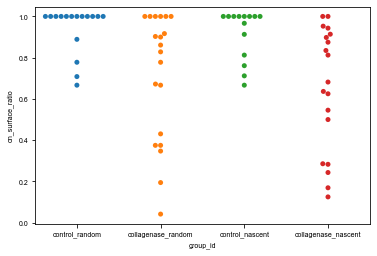

In [23]:
sns.swarmplot(data=df, x='group_id', y='on_surface_ratio')

In [25]:
tukeyTest(df.on_surface_ratio, df.group_id)
tukeyTest(df.on_surface_ratio, df.experiment_group)

Summary of test:
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1             group2       meandiff p-adj   lower  upper  reject
----------------------------------------------------------------------------
collagenase_nascent collagenase_random   0.0658  0.812 -0.1398 0.2714  False
collagenase_nascent    control_nascent   0.2679 0.0138  0.0419 0.4939   True
collagenase_nascent     control_random   0.2914 0.0042  0.0737 0.5092   True
 collagenase_random    control_nascent   0.2021 0.0904 -0.0215 0.4257  False
 collagenase_random     control_random   0.2256 0.0364  0.0104 0.4409   True
    control_nascent     control_random   0.0235    0.9 -0.2113 0.2584  False
----------------------------------------------------------------------------
p values of all pair-wise tests:
 [0.81198905 0.01378688 0.00419302 0.09040597 0.03636749 0.9       ]
Summary of test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
   group1    group2 meandiff p-adj l

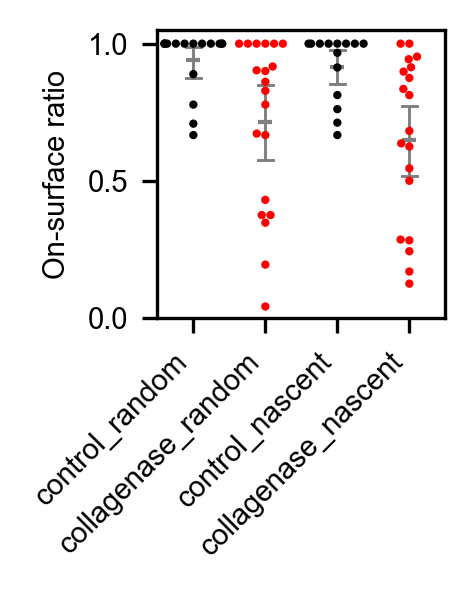

In [5]:
# Make swarm plot with error bars for the raw counts
datasetPrefix = 'SMG-collagenase-surface-residence'
outputFigPath = '../jupyter_figures/' + datasetPrefix + '.svg'

fig_width, fig_height = 1.2, 1.2
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'group_id', 'on_surface_ratio'
# ax.set_ylim([0, 1])

plottingOrder = ['control_random', 'collagenase_random',
                 'control_nascent', 'collagenase_nascent']

# Customize color of each group
paletteDict = {'control': 'black', 'collagenase': 'red'}

ax = sns.swarmplot(x=xCol, y=yCol, data=df,
#                    order=plottingOrder,
                   hue='experiment_group', palette=paletteDict,
#                    color='Gray',
                   size=2.0)
ax = sns.pointplot(x=xCol, y=yCol, data=df,
                   order=plottingOrder,
                   ci=95, capsize=.2, errwidth=.7,
#                    hue='experiment_group', palette=paletteDict,
                   color='Gray',
                   markers='_', scale=.5, join=False)

plt.ylim(0, 1.05)
plt.yticks([0, .5, 1])

plt.xlabel("")
plt.ylabel("On-surface ratio")

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

# remove legend
ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)


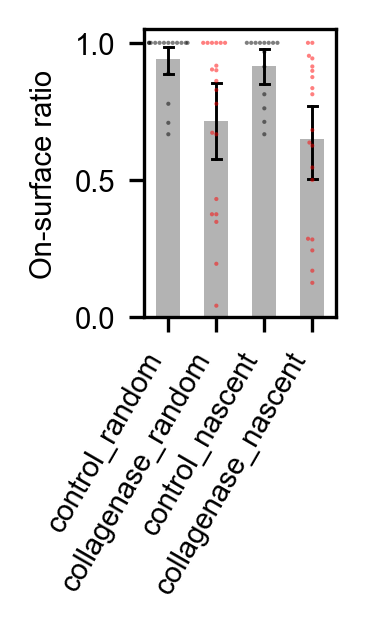

In [6]:
# Make swarm plot with error bars for the raw counts
datasetPrefix = 'SMG-collagenase-surface-residence'
outputFigPath = '../jupyter_figures/' + datasetPrefix + '-bar-swarm.svg'

fig_width, fig_height = .8, 1.2
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'group_id', 'on_surface_ratio'
# ax.set_ylim([0, 1])

plottingOrder = ['control_random', 'collagenase_random',
                 'control_nascent', 'collagenase_nascent']

# Customize color of each group
paletteDict = {'control': 'black', 'collagenase': 'red'}

ax = sns.swarmplot(x=xCol, y=yCol, data=df,
#                    order=plottingOrder,
                   hue='experiment_group', palette=paletteDict,
#                    color='Gray',
#                    color="blue",
                   alpha=.5,
                   size=1.0)

ax = sns.barplot(x=xCol, y=yCol, data=df,
                 order=plottingOrder,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci=95)

plt.ylim(0, 1.05)
plt.yticks([0, .5, 1])

plt.xlabel("")
plt.ylabel("On-surface ratio")

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .5)

# remove legend
ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)


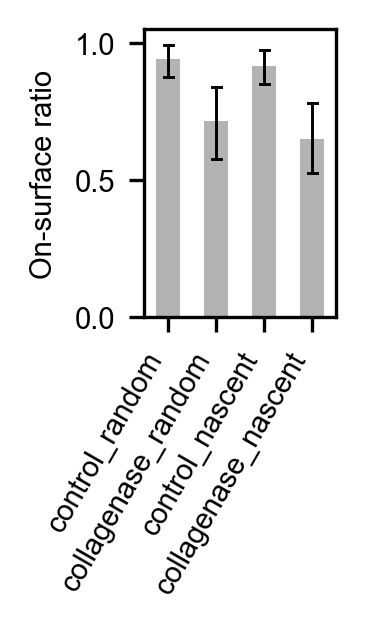

In [8]:
# Make swarm plot with error bars for the raw counts
datasetPrefix = 'SMG-collagenase-surface-residence'
outputFigPath = '../jupyter_figures/' + datasetPrefix + '-bar.svg'

fig_width, fig_height = .8, 1.2
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'group_id', 'on_surface_ratio'
# ax.set_ylim([0, 1])

plottingOrder = ['control_random', 'collagenase_random',
                 'control_nascent', 'collagenase_nascent']

# Customize color of each group
paletteDict = {'control': 'black', 'collagenase': 'red'}

# ax = sns.swarmplot(x=xCol, y=yCol, data=df,
# #                    order=plottingOrder,
#                    hue='experiment_group', palette=paletteDict,
# #                    color='Gray',
# #                    color="blue",
#                    alpha=.5,
#                    size=1.0)

ax = sns.barplot(x=xCol, y=yCol, data=df,
                 order=plottingOrder,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci=95)

plt.ylim(0, 1.05)
plt.yticks([0, .5, 1])

plt.xlabel("")
plt.ylabel("On-surface ratio")

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .5)

# # remove legend
# ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)


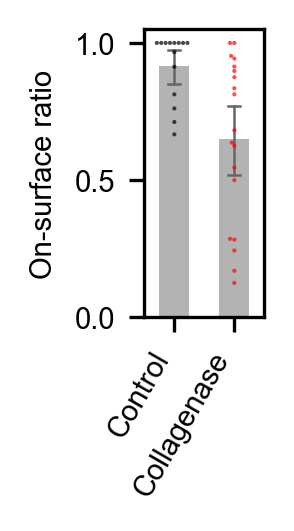

In [20]:
# Make swarm plot with error bars for the raw counts
datasetPrefix = 'SMG-collagenase-nascent-surface-cell-residence'
outputFigPath = '../jupyter_figures/' + datasetPrefix + '-bar-swarm.svg'

fig_width, fig_height = .5, 1.2
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'group_id', 'on_surface_ratio'
# ax.set_ylim([0, 1])

plottingOrder = ['control_nascent', 'collagenase_nascent']

# Customize color of each group
paletteDict = {'control': 'black', 'collagenase': 'red'}

ax = sns.swarmplot(x=xCol, y=yCol, data=df,
                   order=plottingOrder,
                   hue='experiment_group', palette=paletteDict,
#                    color='Gray',
#                    color="blue",
                   alpha=.7,
                   size=1.0)

ax = sns.barplot(x=xCol, y=yCol, data=df,
                 order=plottingOrder,
                 color=".7", alpha=1.0,
                 errwidth=.6, errcolor=".4", capsize=.2, ci=95)

plt.xlabel("")
plt.ylabel("On-surface ratio")
# plt.ylabel("Young's modulus (Pa)")

# rotate x tick labels if necessary
x_labels = ["Control", "Collagenase"]
# x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .5)

# remove legend
ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)


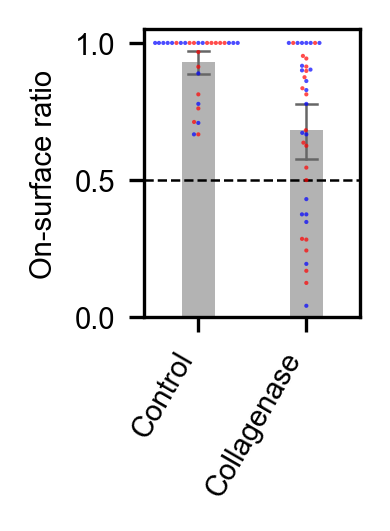

In [72]:
# Make swarm plot with error bars for the raw counts
datasetPrefix = 'SMG-collagenase-nascent-surface-cell-residence'
outputFigPath = '../jupyter_figures/' + datasetPrefix + '-bar-swarm.svg'

fig_width, fig_height = .9, 1.2
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'experiment_group', 'on_surface_ratio'
# ax.set_ylim([0, 1])

plottingOrder = ['control', 'collagenase']

# Customize color of each group
# paletteDict = {'control': 'black',
#                'collagenase': 'red'}
paletteDict = {'control_nascent': 'red',
               'control_random': 'blue',
               'collagenase_nascent': 'red',
               'collagenase_random': 'blue'}

ax = sns.swarmplot(x=xCol, y=yCol, data=df,
                   order=plottingOrder,
                   hue='group_id', palette=paletteDict,
#                    color='Gray',
                   alpha=.7,
                   size=1.)
# ax = sns.pointplot(x=xCol, y=yCol, data=df,
#                    order=plottingOrder,
#                    ci=95, capsize=.2, errwidth=.7,
# #                    hue='experiment_group', palette=paletteDict,
#                    color='Gray',
#                    markers='_', scale=.5, join=False)
ax = sns.barplot(x=xCol, y=yCol, data=df,
                 order=plottingOrder,
                 color=".7", alpha=1.0,
                 errwidth=.6, errcolor=".4", capsize=.2, ci=95)

ax.axhline(y=.5, color='k', linestyle='--', linewidth=0.6)

plt.xlabel("")
plt.ylabel("On-surface ratio")
# plt.ylabel("Young's modulus (Pa)")

# rotate x tick labels if necessary
x_labels = ["Control", "Collagenase"]
# x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .3)

# remove legend
ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)


In [9]:
df.groupby('group_id').describe()

on_surface_ratio                                          \
                               count      mean       std       min       25%   
group_id                                                                       
collagenase_nascent             19.0  0.648672  0.301813  0.125000  0.392857   
collagenase_random              20.0  0.714457  0.308774  0.041667  0.416667   
control_nascent                 14.0  0.916567  0.123268  0.666667  0.837636   
control_random                  16.0  0.940104  0.115617  0.666667  0.972222   

                                             track_duration             \
                          50%       75%  max          count       mean   
group_id                                                                 
collagenase_nascent  0.681818  0.905876  1.0           19.0  64.894737   
collagenase_random   0.844618  1.000000  1.0           20.0  58.750000   
control_nascent      1.000000  1.000000  1.0           14.0  57.500000   
control_random       1.000000  1.000000  1.0           16.0  72.000000   

                                                                
                           std   min    25%   50%   75%    max  
group_id                                                        
collagenase_nascent  36.675597  14.0  48.00  50.0  73.5  150.0  
collagenase_random   20.232530  19.0  51.25  72.0  72.0   72.0  
control_nascent      11.804497  44.0  50.25  53.0  60.5   90.0  
control_random        0.000000  72.0  72.00  72.0  72.0   72.0

In [38]:
df.groupby('experiment_group').describe()

on_surface_ratio                                          \
                            count      mean       std       min       25%   
experiment_group                                                            
collagenase                  39.0  0.682408  0.303198  0.041667  0.402778   
control                      30.0  0.929120  0.117764  0.666667  0.894928   

                                        track_duration                        \
                     50%       75%  max          count       mean        std   
experiment_group                                                               
collagenase       0.8125  0.929924  1.0           39.0  61.743590  29.180669   
control           1.0000  1.000000  1.0           30.0  65.233333  10.798095   

                                                  
                   min    25%   50%   75%    max  
experiment_group                                  
collagenase       14.0  48.00  61.0  72.0  150.0  
control           44.0  55.25  72.0  72.0   90.0

In [7]:
# weighted average of each group
for group in df.group_id.unique():
    temp = df[df.group_id==group]
    temp.reset_index(drop=True, inplace=True)
    tempList = [temp.track_duration[i]*temp.on_surface_ratio[i]
                for i in range(len(temp))]
    temp['n_frames_on_surface'] = tempList
    average_on_surface_ratio = np.sum(temp.n_frames_on_surface)/np.sum(temp.track_duration)
    print('The weighted average of ', group, 'is', average_on_surface_ratio)

The weighted average of  control_random is 0.9401041666875
The weighted average of  collagenase_random is 0.6587234043472341
The weighted average of  control_nascent is 0.9155279503751553
The weighted average of  collagenase_nascent is 0.7404703974128142


In [64]:
# weighted average of each experimental group
for group in df.experiment_group.unique():
    temp = df[df.experiment_group==group]
    temp.reset_index(drop=True, inplace=True)
    tempList = [temp.track_duration[i]*temp.on_surface_ratio[i]
                for i in range(len(temp))]
    temp['n_frames_on_surface'] = tempList
    average_on_surface_ratio = np.sum(temp.n_frames_on_surface)/np.sum(temp.track_duration)
    print('The weighted average of ', group, 'is', average_on_surface_ratio)
    total_track_frames = np.sum(temp.track_duration)
    print('The total track frames of ', group, 'is', total_track_frames)
    print('The average track duration (h) of', group, 'is', temp.track_duration.mean()/12)

The weighted average of  control is 0.9299948901768013
The total track frames of  control is 1957
The average track duration (h) of control is 5.436111111111111
The weighted average of  collagenase is 0.7005813953978406
The total track frames of  collagenase is 2408
The average track duration (h) of collagenase is 5.145299145299146


In [39]:
df.head()

,experiment_group,group_id,on_surface_ratio,track_duration
0,control,control_random,0.888889,72
1,control,control_random,0.708333,72
2,control,control_random,0.777778,72
3,control,control_random,0.666667,72
4,control,control_random,1.000000,72


In [62]:
# Total average duration in hours
df.track_duration.mean()/12

5.271739130434782